In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
soc=pd.read_csv("Social_Network_Ads.csv")
soc

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
gen=pd.get_dummies(soc.Gender,drop_first=True)
soc1=pd.concat([soc['Age'],soc['EstimatedSalary'],gen,soc['Purchased']],axis=1)
soc1

,Age,EstimatedSalary,Male,Purchased
0,19,19000,True,0
1,35,20000,True,0
2,26,43000,False,0
3,27,57000,False,0
4,19,76000,True,0
...,...,...,...,...
395,46,41000,False,1
396,51,23000,True,1
397,50,20000,False,1
398,36,33000,True,0


In [6]:
X=soc1.iloc[:,:-1].values
y=soc1.iloc[:,3].values
X


array([[19, 19000, True],
       [35, 20000, True],
       [26, 43000, False],
       ...,
       [50, 20000, False],
       [36, 33000, True],
       [49, 36000, False]], dtype=object)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [9]:
#fiting data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [10]:
#fitting acurracy
from sklearn.naive_bayes import GaussianNB
cf=GaussianNB()
cf.fit(X_train,y_train)
pred=cf.predict(X_test)

In [11]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,pred))

0.86


In [12]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[57,  5],
       [ 9, 29]], dtype=int64)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        62
           1       0.85      0.76      0.81        38

    accuracy                           0.86       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.86      0.86      0.86       100



In [14]:
#prediction
cf.predict_proba(X_test)

array([[0.9372846 , 0.0627154 ],
       [0.98552985, 0.01447015],
       [0.89713695, 0.10286305],
       [0.96366878, 0.03633122],
       [0.15484576, 0.84515424],
       [0.39774544, 0.60225456],
       [0.97909431, 0.02090569],
       [0.97650321, 0.02349679],
       [0.77411121, 0.22588879],
       [0.15017162, 0.84982838],
       [0.98540917, 0.01459083],
       [0.98824089, 0.01175911],
       [0.47228175, 0.52771825],
       [0.48814957, 0.51185043],
       [0.92445587, 0.07554413],
       [0.94976377, 0.05023623],
       [0.9946957 , 0.0053043 ],
       [0.05739065, 0.94260935],
       [0.17766136, 0.82233864],
       [0.9819141 , 0.0180859 ],
       [0.79649932, 0.20350068],
       [0.56736486, 0.43263514],
       [0.95926616, 0.04073384],
       [0.9015874 , 0.0984126 ],
       [0.97877096, 0.02122904],
       [0.58919161, 0.41080839],
       [0.519942  , 0.480058  ],
       [0.82216098, 0.17783902],
       [0.00848171, 0.99151829],
       [0.81161804, 0.18838196],
       [0.

In [15]:
pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
y_predictProb=cf.predict_proba(X_test)
from sklearn.metrics import auc, roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_predictProb[::,1])
roc_auc=auc(fpr,tpr)
roc_auc

0.9248726655348047

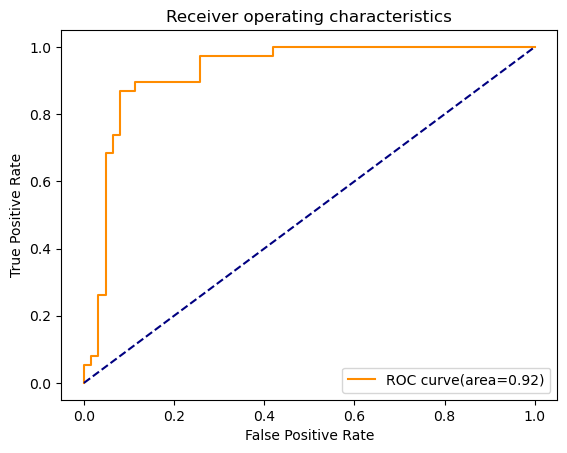

In [18]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()